In [1]:
import torch, re
import torch.utils.data as data_utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\andre\AppData\Local\Temp\ipykernel_308\4219425627.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def load_data():
    ds = []
    # Read from src
    with open('data/train_set.fasta') as f:
        lines = f.read().split(">")[1:]
        ds = [0]*len(lines)
        for i, line in enumerate(tqdm(lines)):
            header, seq, sep = line.strip().split("\n")
            # sep = re.sub("S|T|L|P", "0", sep) # simplify to SP existance
            # sep = re.sub("I|M|O",   "1", sep) # simplify to SP non-existance
            # sep = 1. if "0" in sep else 0.
            ac, kingdom, type_, id_ = header.split("|")
            ds[i] = {
                'header': {
                    'uniprot_ac': ac,
                    'kingdom': kingdom,
                    'type': type_,
                    'id': id_
                },
                'seq': seq,
                'sep': sep
            }
    return pd.DataFrame(ds)

In [3]:
ds = load_data()

  0%|          | 0/20290 [00:00<?, ?it/s]

100%|██████████| 20290/20290 [00:00<00:00, 563648.23it/s]


In [25]:
kingdoms = pd.DataFrame([i['kingdom'] for i in ds.get('header')])
sequences = ds.get('seq')
classes = ds.get('sep')

In [37]:
not_sp = [c for c in classes if set(c).issubset({'I','M','O'})]
sp = [c for c in classes if not set(c).issubset({'I','M','O'})]

In [38]:
len(sp), len(not_sp)

(4665, 15625)

<Axes: xlabel='0'>

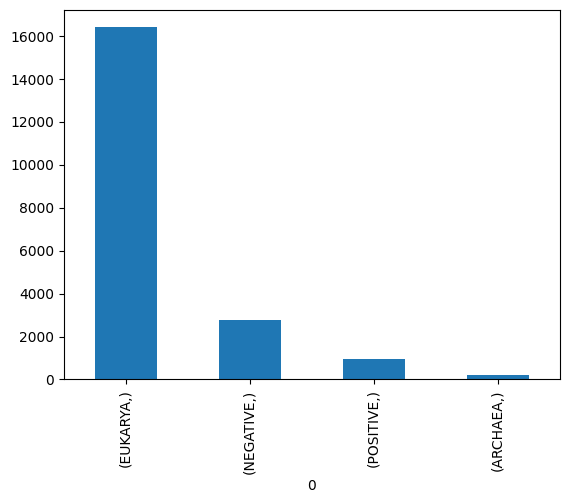

In [17]:
kingdoms.value_counts().plot(kind='bar')